<a href="https://colab.research.google.com/github/ShivaniGole/datascience_economics_finance/blob/main/CPI_time_series_with_Prophet_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CPI Time Series with Prophet model


In [ ]:
pip install fredapi

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import fredapi as fd
import plotly.express as px

In [ ]:
fred=fd.Fred(api_key='cf1a6a3e2ad7010c249a452ffc5c3578')

##Consumer Pricing Index
The Consumer Price Index for All Urban Consumers: All Items (CPIAUCSL) is a price index of a basket of goods and services paid by urban consumers. Percent changes in the price index measure the inflation rate between any two time periods. The most common inflation metric is the percent change from one year ago. It can also represent the buying habits of urban consumers. This particular index includes roughly 88 percent of the total population, accounting for wage earners, clerical workers, technical workers, self-employed, short-term workers, unemployed, retirees, and those not in the labor force.

The CPIs are based on prices for food, clothing, shelter, and fuels; transportation fares; service fees (e.g., water and sewer service); and sales taxes. Prices are collected monthly from about 4,000 housing units and approximately 26,000 retail establishments across 87 urban areas. To calculate the index, price changes are averaged with weights representing their importance in the spending of the particular group. The index measures price changes (as a percent change) from a predetermined reference date. In addition to the original unadjusted index distributed, the Bureau of Labor Statistics also releases a seasonally adjusted index. The unadjusted series reflects all factors that may influence a change in prices. However, it can be very useful to look at the seasonally adjusted CPI, which removes the effects of seasonal changes, such as weather, school year, production cycles, and holidays.


In [ ]:
data=fred.search(' Consumer Price Index for All Urban Consumers: All Items in U.S. City Average')
data

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CPIAUCSL,CPIAUCSL,2024-11-10,2024-11-10,Consumer Price Index for All Urban Consumers: ...,1947-01-01,2024-09-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Seasonally Adjusted,SA,2024-10-10 07:42:03-05:00,95,The Consumer Price Index for All Urban Consume...
CPIAUCNS,CPIAUCNS,2024-11-10,2024-11-10,Consumer Price Index for All Urban Consumers: ...,1913-01-01,2024-09-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Not Seasonally Adjusted,NSA,2024-10-10 07:42:04-05:00,73,Handbook of Methods (https://www.bls.gov/opub/...
CUUS0000SA0,CUUS0000SA0,2024-11-10,2024-11-10,Consumer Price Index for All Urban Consumers: ...,1984-01-01,2024-01-01,Semiannual,SA,Index 1982-1984=100,Index 1982-1984=100,Not Seasonally Adjusted,NSA,2024-07-11 07:40:07-05:00,46,None
CPILFESL,CPILFESL,2024-11-10,2024-11-10,Consumer Price Index for All Urban Consumers: ...,1957-01-01,2024-09-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Seasonally Adjusted,SA,2024-10-10 07:42:03-05:00,82,"The ""Consumer Price Index for All Urban Consum..."
CPILFENS,CPILFENS,2024-11-10,2024-11-10,Consumer Price Index for All Urban Consumers: ...,1957-01-01,2024-09-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Not Seasonally Adjusted,NSA,2024-10-10 07:42:08-05:00,53,The “Consumer Price Index for All Urban Consum...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
APUS12A72511,APUS12A72511,2024-11-10,2024-11-10,Average Price: Fuel Oil #2 per Gallon (3.785 L...,1978-11-01,1997-12-01,Monthly,M,U.S. Dollars,U.S. $,Not Seasonally Adjusted,NSA,2019-07-29 09:33:16-05:00,0,All fuel oil #2. Average consumer prices are ...
APU0000717412,APU0000717412,2024-11-10,2024-11-10,"Average Price: Coffee, Instant, Plain, 3.1-6 O...",1980-01-01,1981-08-01,Monthly,M,U.S. Dollars,U.S. $,Not Seasonally Adjusted,NSA,2019-07-29 09:35:37-05:00,0,Average consumer prices are calculated for hou...
APU0000717326,APU0000717326,2024-11-10,2024-11-10,"Average Price: Coffee, Freeze Dried, Decaf., A...",1984-01-01,1985-11-01,Monthly,M,U.S. Dollars,U.S. $,Not Seasonally Adjusted,NSA,2019-07-29 09:35:38-05:00,0,Average consumer prices are calculated for hou...


In [ ]:
cpi=fred.get_series('CPIAUCSL')
cpi.name='values'
cpi

,values
1947-01-01,21.480
1947-02-01,21.620
1947-03-01,22.000
1947-04-01,22.000
1947-05-01,21.950
...,...
2024-05-01,313.225
2024-06-01,313.049
2024-07-01,313.534
2024-08-01,314.121


In [ ]:
df=pd.DataFrame(cpi).reset_index()
df

,index,values
0,1947-01-01,21.480
1,1947-02-01,21.620
2,1947-03-01,22.000
3,1947-04-01,22.000
4,1947-05-01,21.950
...,...,...
928,2024-05-01,313.225
929,2024-06-01,313.049
930,2024-07-01,313.534
931,2024-08-01,314.121


In [ ]:
fig=px.line(df,x='index',y='values', title ='CPI Average')
fig.show()

##Prophet model and its use
Prophet is an open-source time-series forecasting tool developed by the Core Data Science team at Facebook (now Meta). It is designed to handle a wide range of time-series data and is particularly effective for data that exhibits strong seasonality, trends, and potential outliers.

Prophet is based on an additive model, where the time series is decomposed into three main components:
Trend: Captures long-term changes in the data.
Seasonality: Captures periodic fluctuations (e.g., daily, weekly, yearly).
Holidays/Events: Captures the effects of holidays or other one-off events that can impact the data.

Unlike traditional models like ARIMA that require stationary data (i.e., constant mean and variance over time), Prophet can handle non-stationary data by modeling trends explicitly.

In [ ]:
#conditions for prophet model
#1. univariate data
#2. prophet is predetermined to have daily data

In [ ]:
df=df.rename(columns={'index':'ds','values':'y'})
df

,ds,y
0,1947-01-01,21.480
1,1947-02-01,21.620
2,1947-03-01,22.000
3,1947-04-01,22.000
4,1947-05-01,21.950
...,...,...
928,2024-05-01,313.225
929,2024-06-01,313.049
930,2024-07-01,313.534
931,2024-08-01,314.121


In [ ]:
from prophet import Prophet

ml=Prophet()
ml.fit(df)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphabx1cm5/92s5f4r3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphabx1cm5/v7drsu8w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5504', 'data', 'file=/tmp/tmphabx1cm5/92s5f4r3.json', 'init=/tmp/tmphabx1cm5/v7drsu8w.json', 'output', 'file=/tmp/tmphabx1cm5/prophet_model8hh7tk04/prophet_model-20241111034639.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:46:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:46:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future=ml.make_future_dataframe(periods=10, freq='MS')
future.tail()

,ds
938,2025-03-01
939,2025-04-01
940,2025-05-01
941,2025-06-01
942,2025-07-01


In [ ]:
result=ml.predict(future)
result[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1947-01-01,22.886995,16.862074,28.618557
1,1947-02-01,22.996936,17.249928,28.826996
2,1947-03-01,22.735146,17.412060,28.860934
3,1947-04-01,23.072225,17.244982,28.536722
4,1947-05-01,23.273471,17.091618,28.986907
...,...,...,...,...
938,2025-03-01,297.247632,291.350947,303.282750
939,2025-04-01,297.632382,291.700857,303.376800
940,2025-05-01,298.046972,292.204317,303.841037
941,2025-06-01,298.620567,293.040803,304.568222


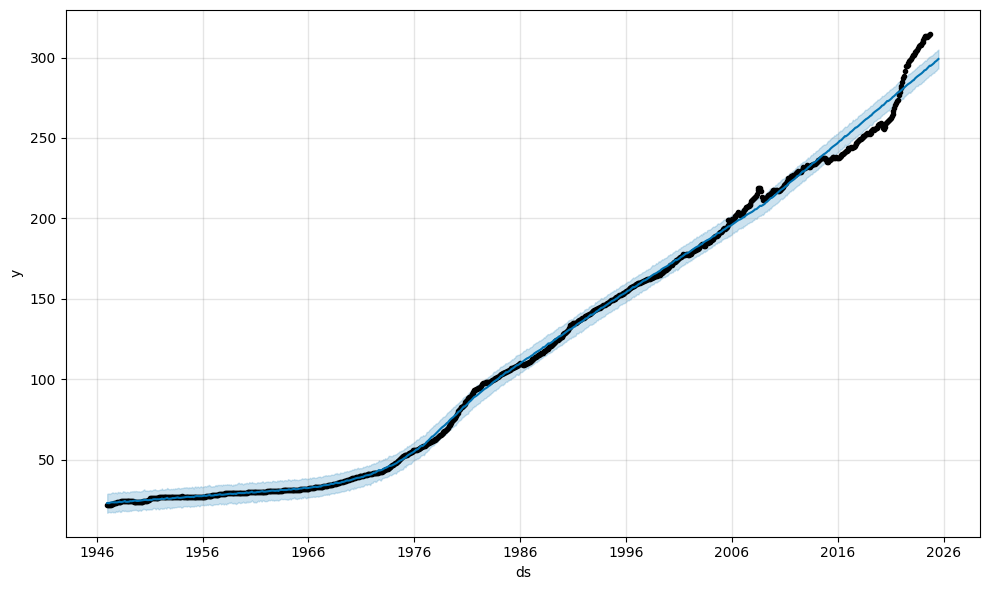

In [ ]:
fig=ml.plot(result)

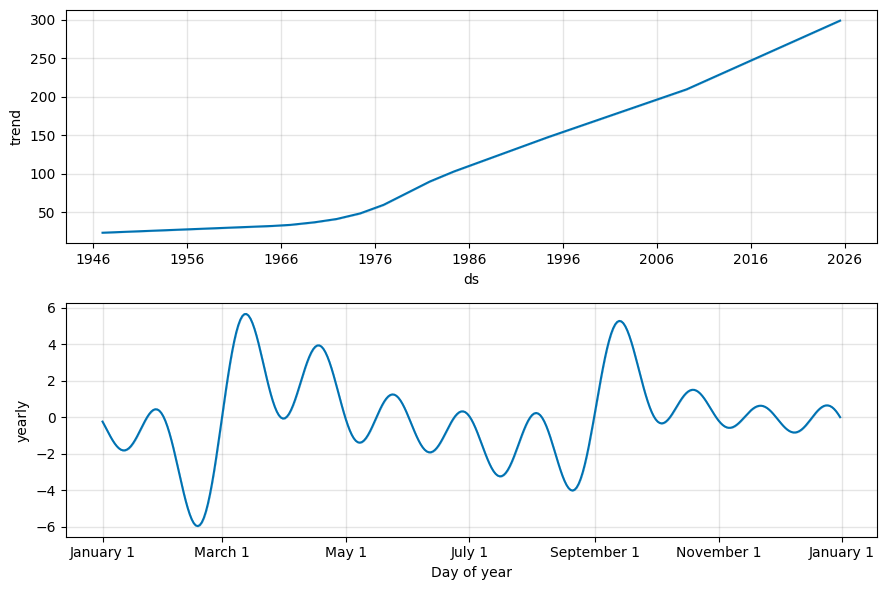

In [ ]:
fig2=ml.plot_components(result)

In [ ]:
from prophet.diagnostics import cross_validation,performance_metrics

cv_result=cross_validation(model=ml,initial=pd.to_timedelta(30*20, unit='D'),period=pd.to_timedelta(30*5, unit='D'), horizon=pd.to_timedelta(30*12, unit='D'))
df_p=performance_metrics(cv_result)




INFO:prophet:Making 183 forecasts with cutoffs between 1948-12-09 00:00:00 and 2023-09-07 00:00:00


  0%|          | 0/183 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphabx1cm5/qt0vt1m7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphabx1cm5/49d1infg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63422', 'data', 'file=/tmp/tmphabx1cm5/qt0vt1m7.json', 'init=/tmp/tmphabx1cm5/49d1infg.json', 'output', 'file=/tmp/tmphabx1cm5/prophet_modeluk22tqtn/prophet_model-20241111040737.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:07:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:07:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphabx1cm5/e98uwj1a.json
DEBUG:cmdstanpy:input tempfi

In [ ]:
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,19.434121,4.408415,2.367786,0.018628,0.012692,0.018795,0.286111
1,38 days,19.662077,4.434194,2.401569,0.018975,0.012692,0.019141,0.282407
2,39 days,19.544330,4.420897,2.377167,0.018914,0.012164,0.019098,0.291667
3,40 days,19.327084,4.396258,2.362034,0.018801,0.011892,0.018980,0.293210
4,41 days,19.631188,4.430710,2.400703,0.018796,0.012480,0.018951,0.290123
...,...,...,...,...,...,...,...,...
319,356 days,42.058796,6.485275,3.370520,0.026486,0.018961,0.026888,0.387037
320,357 days,43.080248,6.563554,3.406120,0.026564,0.019049,0.026973,0.391204
321,358 days,43.139108,6.568037,3.425322,0.026762,0.019162,0.027171,0.384259
322,359 days,42.973990,6.555455,3.402753,0.026652,0.019049,0.027060,0.384259


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:546: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:547: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



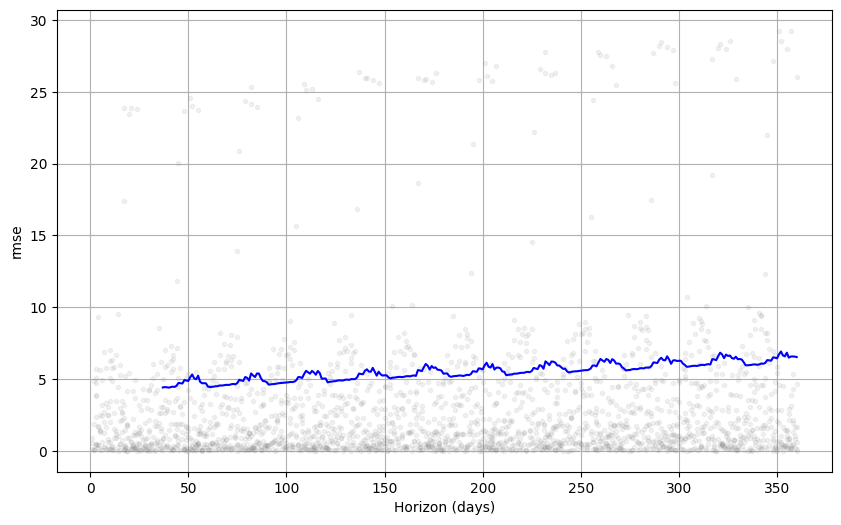

In [ ]:
from prophet.plot import plot_cross_validation_metric

fig=plot_cross_validation_metric(cv_result, metric='rmse')